In [92]:
!pip install visualkeras

In [93]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras

In [95]:
train_data = pd.read_csv('./fashion-mnist_train.csv')
test_data = pd.read_csv('./fashion-mnist_test.csv')

In [96]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


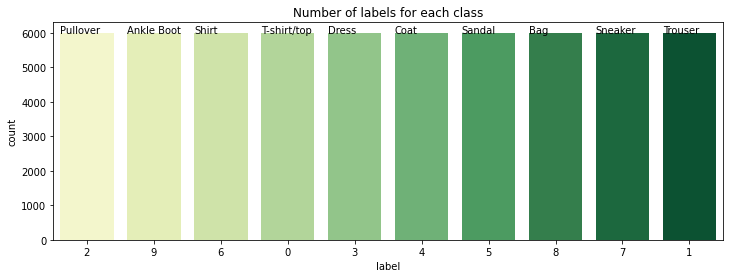

In [97]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index, palette='YlGn')
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train_data)

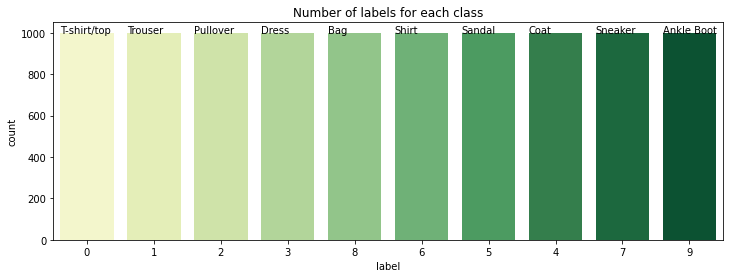

In [98]:
plot_label_per_class(test_data)

In [99]:
def sample_images_data(data):
    sample_images = []
    sample_labels = []

    for k in labels.keys():
        samples = data[data["label"] == k].head(4)
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("number of images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

number of images to plot:  40


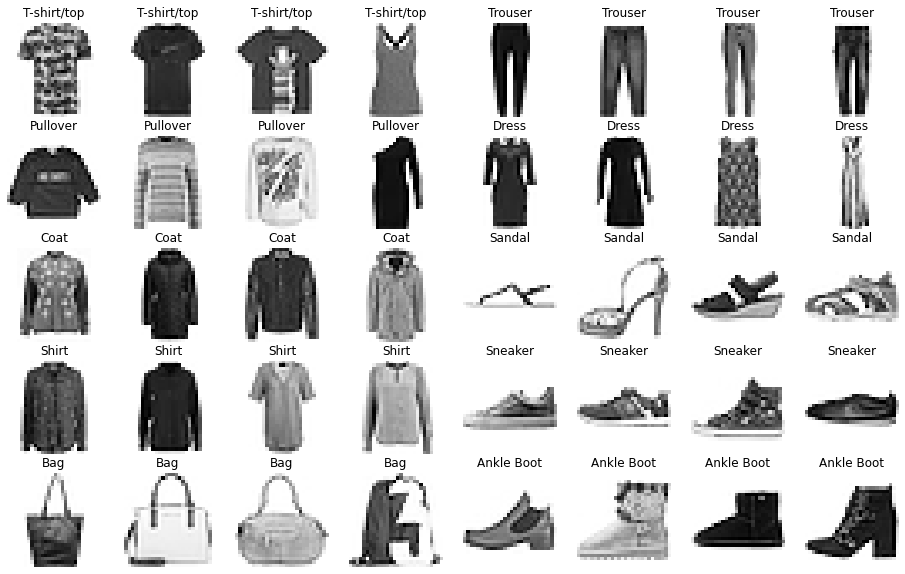

In [100]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Greys"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greys")

number of images to plot:  40


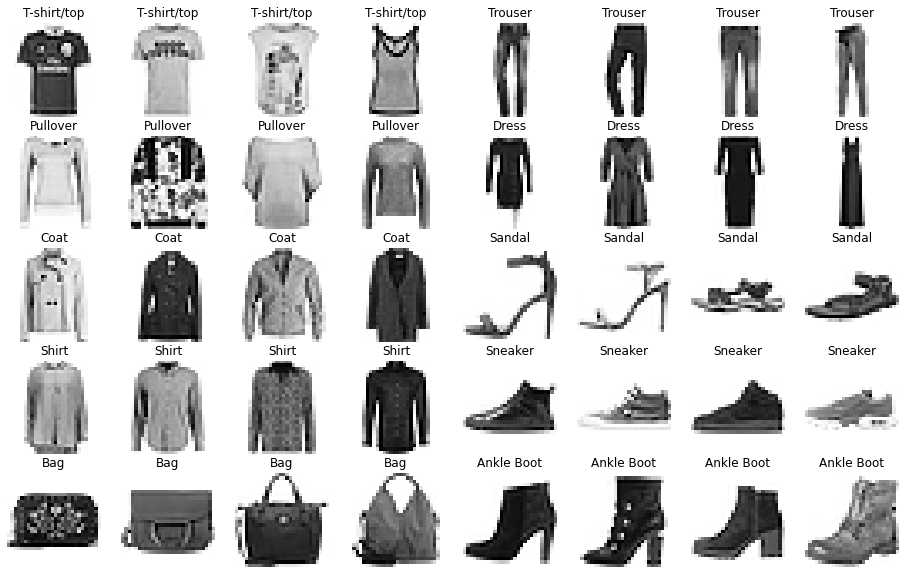

In [101]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels,"Greys")

In [102]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.np_utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array
    return out_x, out_y

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from keras.utils import np_utils

# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [104]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

In [105]:
print("training set size",x_train.shape[0], x_train.shape[1:4])
print("validation set size",x_val.shape[0], x_val.shape[1:4])
print("test set size",X_test.shape[0]," columns:", X_test.shape[1:4])

training set size 48000 (28, 28, 1)
validation set size 12000 (28, 28, 1)
test set size 10000  columns: (28, 28, 1)


### CNN

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers. 

 <p>Convolutional layer </p>
 <p>Pooling layer </p>
 <p>Fully-connected layer</p>





1.  The <b>number of filters</b> affects the depth of the output. For example, three distinct filters would yield three different feature maps, creating a depth of three. 

2. <b>Stride </b>is the distance, or number of pixels, that the kernel moves over the input matrix. While stride values of two or greater is rare, a larger stride yields a smaller output.

3. <b>Padding</b> is usually used when the filters do not fit the input image. This sets all elements that fall outside of the input matrix to zero, producing a larger or equally sized output.




#### pooling layer

Downsampling, also known as pooling layers, is a dimensionality reduction technique that reduces the number of factors in the input. The pooling process sweeps a filter across the entire input, similar to the convolutional layer, however this filter does not have any weights. Instead, the kernel uses an aggregation function to populate the output array from the values in the receptive field. Pooling can be divided into two categories called max pooling and average pooling.

Max pooling
<p>As the filter moves across the input, it selects the pixel with the maximum value to send to the output array. As an aside, this approach tends to be used more often compared to average pooling.</p>

Average pooling
<p>As the filter moves across the input, it calculates the average value within the receptive field to send to the output array.</p>




#### Fully connected layers

The full-connected layer's name is self-explanatory. In partially linked layers, the pixel values of the input image are not directly connected to the output layer, as previously stated. Each node in the output layer, on the other hand, connects directly to a node in the previous layer in the fully-connected layer.
.

<p>For more details: </p>

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
https://www.ibm.com/cloud/learn/convolutional-neural-networks



In [106]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


## Model 2

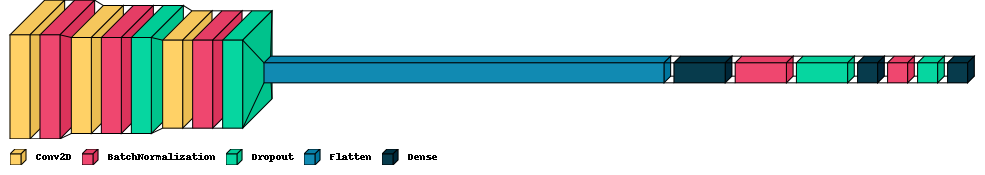

In [107]:
# Model2
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(BatchNormalization())

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))


visualkeras.layered_view(model2,legend=True)


In [108]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
history_model2 = model2.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
                  verbose=0,
          validation_data=(x_val, y_val)),


score_model2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_model2[0])
print('Test accuracy:', score_model2[1])

Test loss: 0.3217170834541321
Test accuracy: 0.9279999732971191


CNN Model W

## Model 1


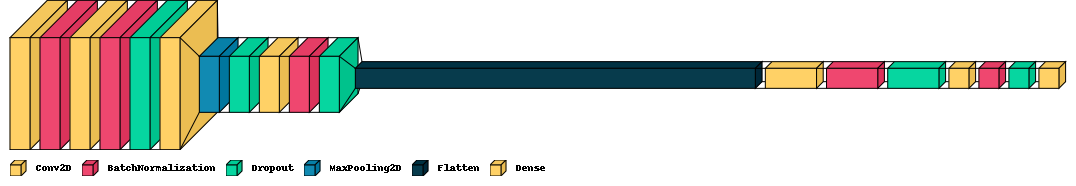

In [109]:


#model1
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
    
    
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))
visualkeras.layered_view(model1,legend=True)


In [110]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
history_model1 = model1.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          validation_data=(x_val, y_val),
        verbose=0)

score_model1 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_model1[0])
print('Test accuracy:', score_model1[1])

Test loss: 0.22631025314331055
Test accuracy: 0.9412000179290771


### Model 3

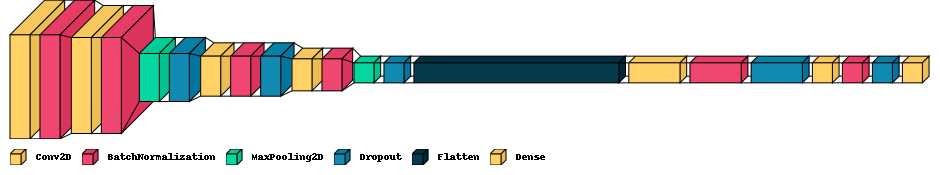

In [112]:
#model3
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(BatchNormalization())

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

visualkeras.layered_view(model3,legend=True)


In [113]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
history_model3 = model3.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
                   verbose=0,
          validation_data=(x_val, y_val))
score_model3 = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_model3[0])
print('Test accuracy:', score_model3[1])

Test loss: 0.20409521460533142
Test accuracy: 0.9347000122070312


## Model 4

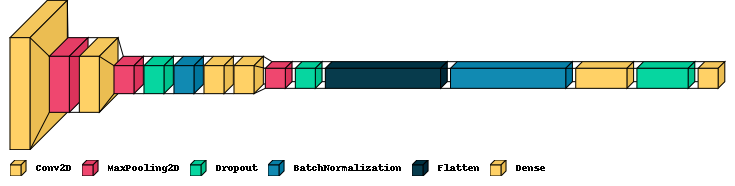

In [114]:
#model4
model4 = Sequential()

model4.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Conv2D(64, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Dropout(0.3))
model4.add(BatchNormalization())
model4.add(Conv2D(128, 3, padding='same', activation='relu'))
model4.add(Conv2D(128, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dense(512, activation='relu'))

model4.add(Dropout(0))
model4.add(Dense(10, activation='softmax'))

visualkeras.layered_view(model4,legend=True)


In [115]:
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
history_model4 = model4.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
                    verbose=0,
          validation_data=(x_val, y_val))

score_model4 = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_model4[0])
print('Test accuracy:', score_model4[1])

Test loss: 0.21086713671684265
Test accuracy: 0.9257000088691711


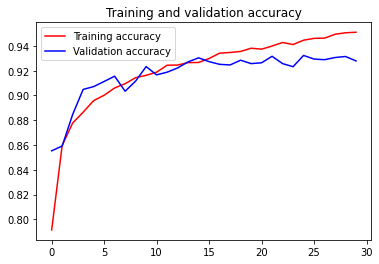

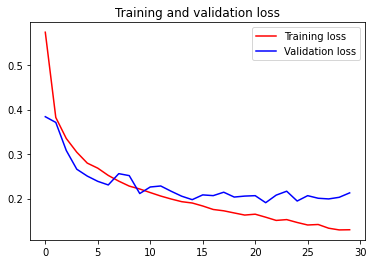

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history_model4.history['accuracy']
val_accuracy = history_model4.history['val_accuracy']
loss = history_model4.history['loss']
val_loss = history_model4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [117]:
# Predictions for the test data
predicted_classes = (model4.predict(X_test) > 0.5).astype("int32")

# Indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.81      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.97      0.80      0.88      1000
     Class 3       0.93      0.94      0.94      1000
     Class 4       0.88      0.91      0.89      1000
     Class 5       0.98      0.99      0.98      1000
     Class 6       0.76      0.87      0.81      1000
     Class 7       0.98      0.94      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.95      0.98      0.97      1000

   micro avg       0.93      0.92      0.93     10000
   macro avg       0.93      0.92      0.93     10000
weighted avg       0.93      0.92      0.93     10000
 samples avg       0.92      0.92      0.92     10000



In [118]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

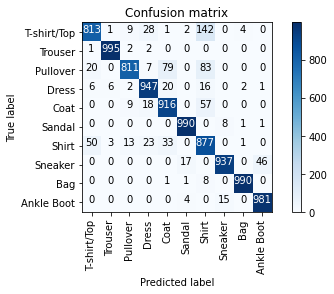

In [119]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
# Predict the values from the validation dataset
Y_pred = model4.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])